## TF-co-occurences with newly found tf-motifs

#### constant variables and imports

In [7]:
from tfcomb import CombObj
import os
import pathlib

'''
Constants for this script
'''
genome_path="../testdaten/hg19_masked.fa"
main_jaspar_file="../testdaten/JASPAR2020_CORE_vertebrates.meme" 
result_path="./results/wp5/"

merged_motif_path=f"{result_path}prepared_jaspar_files/"
motif_path="../testdaten/wp5/new_motifs/"

path_to_clusters="../testdaten/enhancers/"
cluster_file_name="CD14+_enhancers.bed"

joined_jaspar_file_name = "joined_motifs.jaspar"

# create result folders 
if not os.path.exists(result_path):
     pathlib.Path(result_path).mkdir(parents=True, exist_ok=True)

if not os.path.exists(merged_motif_path):
     pathlib.Path(merged_motif_path).mkdir(parents=True, exist_ok=True)
        

if not os.path.exists(genome_path):
    print(f"ERROR: path {genome_path} does not exist")

if not os.path.exists(main_jaspar_file):
    print(f"ERROR: path {main_jaspar_file} does not exist")

if not os.path.exists(motif_path):
    print(f"ERROR: path {motif_path} does not exist")

In [8]:
'''
You need this to use TOBIAS command line tool in your python envrionment
Find the path to the tobias command with:
type TOBIAS
'''
TOBIAS_command="/home/stud6/.conda/envs/tfcomb_env/bin/TOBIAS"
#environ['PATH'] += pathsep + tobias_path
#print(environ['PATH'])


#### function definition for the market basket analyses

In [9]:
def do_market_basket_analyses_for_cell_cluster(cell_cluster_name: str, cell_cluster_path:str):
    '''
        Does market basket analyses.
    '''
    comb = CombObj()
    comb.TFBS_from_motifs(regions= cell_cluster_path,
                   motifs=f"{merged_motif_path}{joined_jaspar_file_name}",
                   genome=genome_path,
                   threads=4)
    
    print(f'Start market basket analyses for cell-cluster/type: {cell_cluster_name}')
    comb.market_basket(threads=10)
    if len(comb.rules) <= 0:
        print(f'Could not find TF-cooccurences for cell-cluster/type: {cell_cluster_name}')
        return
    print(f'Finished market basket analyses for cell-cluster/type: {cell_cluster_name}')
    print(f'Found rules: {len(comb.rules)}')
    comb.to_pickle(f'{result_path}{cell_cluster_name}.pkl')
    print(f'Saved: {result_path}{cell_cluster_name}.pkl')



#### function definition to read in files of folder

In [10]:
def read_in_file_names_of_folder(rel_path:str):
    return [f for f in os.listdir(rel_path) if os.path.isfile(os.path.join(rel_path, f))]

def merge_new_motif_to_jaspar_file(new_motif_file_name: str , new_motif_name: str):
    '''
    Merge a new Motif to a jaspar file with known motifs by using TOBIAS FormatMotif tool
    --input test_data/individual_motifs/*
    '''
    if not os.path.exists(f"{merged_motif_path}{joined_jaspar_file_name}"):
        print("Create joined_motif File.")
        print(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{main_jaspar_file} --task join --output {merged_motif_path}{joined_jaspar_file_name}')
        os.system(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{main_jaspar_file} --task join --output {merged_motif_path}{joined_jaspar_file_name}')
    else:
        print(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{merged_motif_path}{joined_jaspar_file_name} --task join --output {merged_motif_path}{joined_jaspar_file_name}')
        os.system(f'{TOBIAS_command} FormatMotifs --input {motif_path}{new_motif_file_name}{" "}{merged_motif_path}{joined_jaspar_file_name} --task join --output {merged_motif_path}{joined_jaspar_file_name}')
        
cluster_file_names = read_in_file_names_of_folder(rel_path=path_to_clusters)
print(cluster_file_names)


['CD8+_enhancers.bed', 'HCT116_enhancers.bed', 'HL-60_enhancers.bed', 'FT246_enhancers.bed', 'SK-N-SH_RA_enhancers.bed', 'LNCaP_enhancers.bed', 'T98G_enhancers.bed', 'Fetal_placenta_enhancers.bed', 'Small_intestine_enhancers.bed', 'Cerebellum_enhancers.bed', 'GM19240_enhancers.bed', 'HEK293_enhancers.bed', 'Fetal_muscle_leg_enhancers.bed', 'Left_ventricle_enhancers.bed', 'CD14+_enhancers.bed', 'KB_enhancers.bed', 'Astrocyte_enhancers.bed', 'GM18951_enhancers.bed', 'PANC-1_enhancers.bed', 'GM12878_enhancers.bed', 'A549_enhancers.bed', 'CUTLL1_enhancers.bed', 'Osteoblast_enhancers.bed', 'ESC_neuron_enhancers.bed', 'CD19+_enhancers.bed', 'Fetal_kidney_enhancers.bed', 'ME-1_enhancers.bed', 'H9_enhancers.bed', 'CD4+_enhancers.bed', 'Skeletal_muscle_enhancers.bed', 'Fetal_spinal_cord_enhancers.bed', 'GM12891_enhancers.bed', 'LHCN-M2_enhancers.bed', 'MCF-7_enhancers.bed', 'Spleen_enhancers.bed', 'PrEC_enhancers.bed', 'NB4_enhancers.bed', 'Pancreas_enhancers.bed', 'GM12892_enhancers.bed', 'Spe

### Market basket analyses with newly found motifs
Idea: WP5 finds motifs for a special cell_line/cluster/tissue e.g. liver cells. WP6 takes the new motifs and tests them for TF-co-occurences in the specific cellline/cluster

In [ ]:
/**
new_motif_file_names = read_in_file_names_of_folder(rel_path=motif_path)
#cell_line_names = read_in_file_names_of_folder(rel_path=enhancer_path)
new_motif_names = []

for new_motif_file_name in new_motif_file_names:
    motif_name = new_motif_file_name.split('.')[0]
    new_motif_names.append(motif_name)
    cell_line_name = cell_line_file_name.split('.')[0]

    print(new_motif_file_name)
    print(motif_name)
    print(cell_line_name)
    
    merge_new_motif_to_jaspar_file(new_motif_file_name=new_motif_file_name, new_motif_name=motif_name)
    
    do_market_basket_analyses(genome_path=genome_path, 
                              cell_line_name=cell_line_name,
                              rel_path_cell_line=f"{cell_line_path}{cell_line_file_name}",
                              motif_name=motif_name,
                              rel_path_motif=f"{merged_motif_path}joined_{motif_name}.jaspar"
                             )
**/

In [11]:
new_motif_file_names = read_in_file_names_of_folder(rel_path=motif_path)
new_motif_names = []

for new_motif_file_name in new_motif_file_names:
    motif_name = new_motif_file_name.split('.')[0]
    new_motif_names.append(motif_name)
    cluster_name = cluster_file_name.split('.')[0]
    merge_new_motif_to_jaspar_file(new_motif_file_name=new_motif_file_name, new_motif_name=motif_name)

for file_name in cluster_file_names:
    cluster_name = file_name.split('.')[0]
    print(cluster_name)
    print(file_name)
    cluster_path=f"{path_to_clusters}{file_name}"
    do_market_basket_analyses_for_cell_cluster(cell_cluster_name=cluster_name, cell_cluster_path=cluster_path)
    
    # TODO: Remove break, if you want to make the mbasket for all clusters
    break    


Create joined_motif File.
/home/stud6/.conda/envs/tfcomb_env/bin/TOBIAS FormatMotifs --input ../testdaten/wp5/new_motifs/motif_10_motif_10.meme ../testdaten/JASPAR2020_CORE_vertebrates.meme --task join --output ./results/wp5/prepared_jaspar_files/joined_motifs.jaspar
# TOBIAS 0.13.2 FormatMotifs (run started 2022-01-22 14:40:30.676575)
# Working directory: /mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse
# Command line call: TOBIAS FormatMotifs --input ../testdaten/wp5/new_motifs/motif_10_motif_10.meme ../testdaten/JASPAR2020_CORE_vertebrates.meme --task join --output ./results/wp5/prepared_jaspar_files/joined_motifs.jaspar

# ----- Input parameters -----
# input:	['../testdaten/wp5/new_motifs/motif_10_motif_10.meme', '../testdaten/JASPAR2020_CORE_vertebrates.meme']
# output:	./results/wp5/prepared_jaspar_files/joined_motifs.jaspar
# format:	jaspar
# task:	join
# filter:	None
# verbosity:	3


# ----- Output files -----
# ./results/wp5/prepared_jaspar_files/joined_mo

### Analyse the co-occurences


['motif_10_motif_10', 'motif_29_motif_29']
['CD8+_enhancers.pkl']
motif_10
INFO: Selected 282 rules
INFO: Creating subset of object
<CombObj: 84484 TFBS (748 unique names) | Market basket analysis: 282 rules>
INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds
<CombObj: 131805 TFBS (748 unique names) | Market basket analysis: 7134 rules>
INFO: Selected 2 rules
INFO: Creating subset of object
                    TF1   TF2  TF1_TF2_count  TF1_count  TF2_count    cosine  \
motif_10-KLF5  motif_10  KLF5             14        126       1276  0.034915   
motif_10-SP2   motif_10   SP2             10        126        698  0.033720   

                 zscore  
motif_10-KLF5  3.319900  
motif_10-SP2   3.674017  
motif_29
INFO: Selected 473 rules
INFO: Creating subset of object
<CombObj: 114855 TFBS (748 unique names) | Market basket analysis: 473 rules>
INFO: x

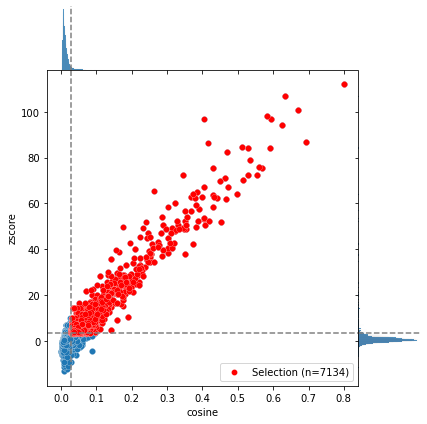

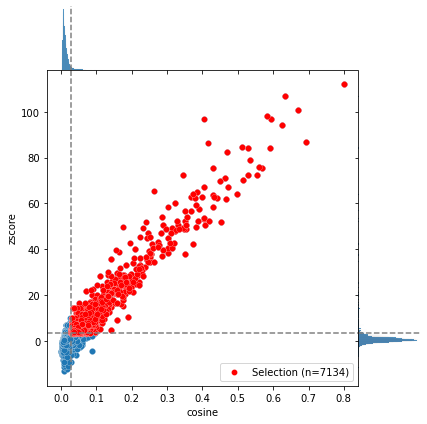

In [17]:
results_files_names_market_basket_analyses= read_in_file_names_of_folder(rel_path=result_path)

print(new_motif_names)


# TODO: for file_name in results_files_names_market_basket_analyses:    

# Example, just taking the first analyses
print(results_files_names_market_basket_analyses)
A = CombObj().from_pickle(f"{result_path}{results_files_names_market_basket_analyses[0]}")

for motif in new_motif_names:
    
    motif_name = f"{motif.split('_')[0]}_{motif.split('_')[1]}"
    print(motif_name)
    not_sig = A.select_TF_rules([motif_name], TF2=False)
    print(not_sig)
    significant = A.select_significant_rules()
    print(significant)
    selected3 = significant.select_TF_rules([motif_name], TF2=False)
    #print(selected3)
    print(selected3.rules)
    

In [ ]:
selected3